In [ ]:
from google.colab import files
uploaded = files.upload()


Saving basecensus.csv.xls to basecensus.csv.xls


In [ ]:
import pandas as pd
import numpy as np

arquivo = pd.read_csv('basecensus.csv.xls')
arquivo2 = pd.read_csv('basecensus.csv.xls')
arquivo3 = pd.read_csv('basecensus.csv.xls')

In [ ]:
arquivo.drop('final.weight', axis = 1, inplace = True)

In [ ]:
arquivo.drop('workclass', axis = 1, inplace = True)

In [ ]:
arquivo.drop('capital.loos', axis = 1, inplace = True)

In [ ]:
arquivo.drop('capital.gain', axis = 1, inplace = True)

In [ ]:
arquivo.drop('education', axis = 1, inplace = True)

In [ ]:
arquivo.drop('occupation', axis = 1, inplace = True)

In [ ]:
arquivo.drop('relationship', axis = 1, inplace = True)

In [ ]:
arquivo.drop('education.num', axis = 1, inplace = True)

In [ ]:
arquivo.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
arquivo.drop('native.country', axis = 1, inplace = True)

In [ ]:
arquivo.drop('race', axis = 1, inplace=True)

In [ ]:
y = arquivo ['marital.status']

In [ ]:
arquivo.drop('marital.status', axis = 1, inplace = True)

In [ ]:
x = arquivo
h = arquivo['age']
j = arquivo['hour.per.week']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

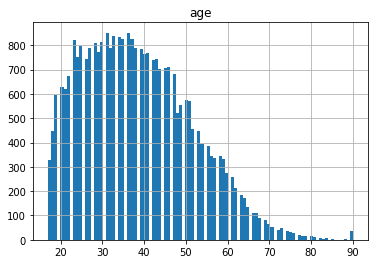

In [ ]:
arquivo.hist(column='age', bins=100)
plt.show()

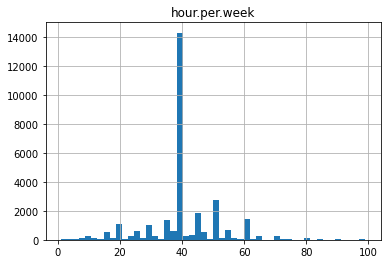

In [ ]:
arquivo.hist(column='hour.per.week', bins=50)
plt.show()

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Never-married', 0)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Married-spouse-absent', 1)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Divorced', 2)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Married-civ-spouse', 1)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Married-AF-spouse', 1)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Widowed', 0)

In [ ]:
arquivo['marital.status'] = arquivo['marital.status'].replace(' Separated', 2)

In [ ]:
arquivo.head()


,age,marital.status,sex,hour.per.week,income
0,39,0,Male,40,<=50K
1,50,1,Male,13,<=50K
2,38,2,Male,40,<=50K
3,53,1,Male,40,<=50K
4,28,1,Female,40,<=50K


In [ ]:
arquivo = pd.get_dummies(arquivo, columns=['sex'])

In [ ]:
arquivo = pd.get_dummies(arquivo, columns=['income'])

In [ ]:
arquivo.head()


,age,hour.per.week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,40,0,1,1,0
1,50,13,0,1,1,0
2,38,40,0,1,1,0
3,53,40,0,1,1,0
4,28,40,1,0,1,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x ,y , test_size=0.30)



In [ ]:
y_test

28350    1
2840     1
2065     1
9237     0
18523    1
        ..
16189    2
18744    1
4397     0
6673     1
435      0
Name: marital.status, Length: 9049, dtype: int64

In [ ]:
X_test

,age,hour.per.week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
28350,42,40,1,0,1,0
2840,60,84,0,1,1,0
2065,51,40,0,1,0,1
9237,64,15,1,0,1,0
18523,55,40,0,1,1,0
...,...,...,...,...,...,...
16189,39,40,0,1,1,0
18744,48,55,0,1,0,1
4397,51,70,1,0,0,1
6673,26,40,0,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modeloForest = RandomForestClassifier(n_estimators=10)
modeloForest.fit(x, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
print(modeloForest.feature_importances_)

[0.46819691 0.16279847 0.06774276 0.10517249 0.1149103  0.08117907]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

modeloArvore = ExtraTreesClassifier()
modeloArvore.fit(X_train, y_train)

previsaoArvore = modeloArvore.score(X_test, y_test)

print("A acurácia do modelo Arvore de Decisão foi",previsaoArvore)



A acurácia do modelo Arvore de Decisão foi 0.6843850149187756


In [ ]:
from sklearn.linear_model import LinearRegression

modeloRegressaoLinear = LinearRegression()

modeloRegressaoLinear.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff = pd.DataFrame(modeloRegressaoLinear.coef_, x.columns, columns=['Coeficiente'])
coeff


,Coeficiente
age,1.014991e-01
hour.per.week,2.571627e-02
sex_ Female,5.999759e+11
sex_ Male,5.999759e+11
income_ <=50K,-2.687693e+12
income_ >50K,-2.687693e+12


In [ ]:
#valores contínuos

In [ ]:
from sklearn.linear_model import LogisticRegression
modeloRL = LogisticRegression(solver='lbfgs',max_iter=1000)

modeloRL.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
previsaoRL = modeloRL.predict(X_test)
previsaoRL

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,previsaoRL))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      3118
           1       0.74      0.83      0.78      4348
           2       0.53      0.28      0.37      1583

    accuracy                           0.69      9049
   macro avg       0.64      0.61      0.61      9049
weighted avg       0.68      0.69      0.68      9049



In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, previsaoRL)
print(conf_mat)

[[2217  612  289]
 [ 643 3600  105]
 [ 513  621  449]]


In [ ]:
#da pra notas q a variavel 0(sendo os Nunca Casados) é a que contem mais erros. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x)
dados_transformados = mms.transform(x)
print("\nDados depois da mudança de escala:\n", dados_transformados)


Dados depois da mudança de escala:
 [[0.30136986 0.39795918 0.         1.         1.         0.        ]
 [0.45205479 0.12244898 0.         1.         1.         0.        ]
 [0.28767123 0.39795918 0.         1.         1.         0.        ]
 ...
 [0.56164384 0.39795918 1.         0.         1.         0.        ]
 [0.06849315 0.19387755 0.         1.         1.         0.        ]
 [0.47945205 0.39795918 1.         0.         0.         1.        ]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifierKNN = KNeighborsClassifier(n_neighbors = 4)  
classifierKNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifierKNN.predict(X_test)

In [ ]:
y_pred

array([2, 1, 1, ..., 1, 0, 1])

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[2231  574  313]
 [ 902 3210  236]
 [ 576  539  468]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.65      3118
           1       0.74      0.74      0.74      4348
           2       0.46      0.30      0.36      1583

    accuracy                           0.65      9049
   macro avg       0.60      0.58      0.58      9049
weighted avg       0.64      0.65      0.64      9049



Aqui da pra notar q temos problemas variados nas metricas. 
0 never married - vemos que se erram mais os valores 1- married.
1 married - vemos q os mais errados são 0 e 2.
2 divorced - vemos q os mais errados são 

In [ ]:
precisaoKNN = str(round(classifierKNN.score(X_test,y_test) * 100, 2))+"%"

print("A acurácia do modelo k-NN foi",precisaoKNN)

A acurácia do modelo k-NN foi 67.08%


In [ ]:
scores = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(x,y)
  modeloKNN = KNeighborsClassifier()
  modeloKNN.fit(X_train,y_train)
  precisaoKNN = modeloKNN.score(X_test,y_test)
  scores.append(precisaoKNN)
  modeloKNN = str(round(modeloKNN.score(X_test,y_test) * 100, 2))+"%"



print("A acurácia do modelo k-NN foi",precisaoKNN)
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


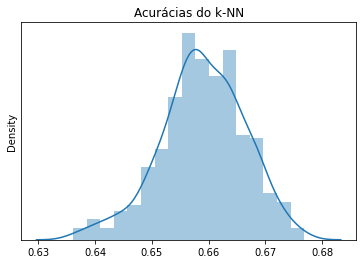

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix

modeloNB = GaussianNB()

modeloNB.fit(X_train,y_train)

precisaoNB = str(round(modeloNB.score(X_test,y_test) * 100, 2))+"%"

print("A acurácia do modelo Gaussiano foi",precisaoNB)





A acurácia do modelo Gaussiano foi 66.33%


In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
modeloM = MultinomialNB()

modeloM.fit(X_train,y_train)

precisaoM = str(round(modeloM.score(X_test,y_test) * 100, 2))+"%"

print(precisaoM)

62.45%


In [ ]:
from sklearn.naive_bayes import BernoulliNB

modeloB = BernoulliNB()

modeloB.fit(X_train,y_train)

precisaoB = str(round(modeloB.score(X_test,y_test) * 100, 2))+"%"

print(precisaoB)

60.02%
